<a href="https://colab.research.google.com/github/Alonso-Celis/PSante_celis_alonso/blob/main/PSant%C3%A9_02_notebookexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet 2. Concevez une application au service de la santé publique. 

### Notebook de l'exploration.

### Sommaire

1.   **Chargement at affichage de données du jeu de données nettoyé**
2.   **Analyse univarié**
    * *Mesures de forme*
    * *Mesures de concentration*
    * *Catégories*
3.   **Analyse multivarié**
    * *Rélation entre variables quantitatives*
    * *Rélation entre variables qualitatives.*
4.   **Conclusions**

## Analyse univarié

## Mesures de forme

Tout au long de cette section, nous allons faire une analyse de chacune de nos variables pertinentes. Il est d'intêret connaître la *forme* de ces variables quantitatives, donc commençons par explorer leur distribution puis on fera une exploration de leur niveau de symmétrie.

On commence par la lecture de jeu de données modifié précédement. Une copie est est dans dans [ce répertoire](https://drive.google.com/drive/folders/1MhJsmuR4qSc0En1BPuHbarmG-J0Z4Xj5).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/new_data.csv", sep=",", low_memory=False)

In [ ]:
df.head()

,product_name,brands,categories,origins,manufacturing_places,stores,countries,nutriscore_score,nutriscore_grade,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
0,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",sans origine,non connu,courte paille,France,18.0,d,936.0,29.00,5.1,8.20
1,Blanquette de Volaille et son Riz,Comme J’aime,"Plats préparés, Produits à la viande, Plats pr...",France,France,Comme J'aime,France,0.0,b,450.0,15.30,6.8,2.20
2,Pâte d'Amandes,Alice Délice,"Massepain, Pâtes d'amande",sans origine,non connu,Alice Délice,France,15.0,d,1732.0,77.02,4.2,10.29
3,7Up,"7Up,Pepsico","Aliments et boissons à base de végétaux, Boiss...",sans origine,non connu,Cora Cafétéria,France,13.0,e,177.0,10.40,0.0,0.00
4,Madeleines nature,Bijou,"Snacks, Desserts, Snacks sucrés, Biscuits et g...",sans origine,"Saint Yrieix,France","M2I,Bijou",France,14.0,d,1900.0,55.00,6.0,23.00


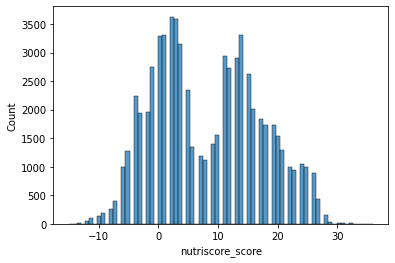

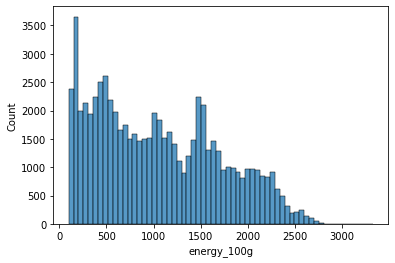

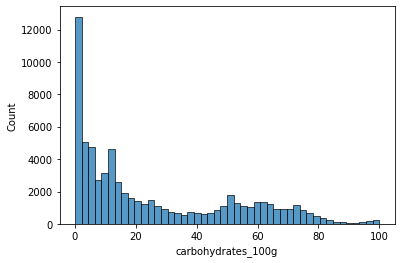

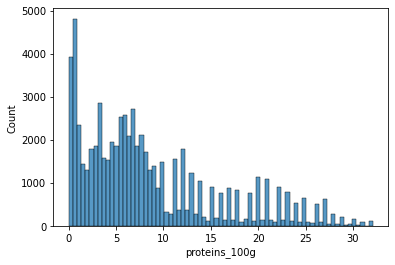

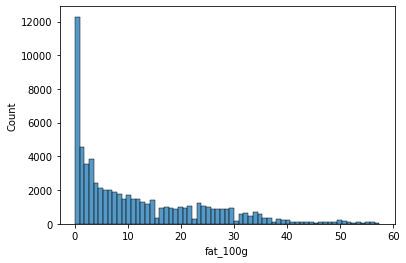

In [ ]:
for vari in df.columns:
  if df[vari].dtype == float:
    sns.histplot(df[vari])
    plt.show()

D'après les distributions obtenues, nous pouvons déduire que le skew est positive pour chacune de nos variables, dont la distribution la plus asymétrique correspond à celle du nutri score.

Confirmons ce qu'on vient de dire en calculant les mesures d'asymétrie et d'aplatissement. On ajoute également des visualisations du type [fivethirtyeight](https://fivethirtyeight.com/), lequelles on aime bien.

nutriscore_score
moy:
 8.235935379361674
med:
 8.0
mod:
 0    2.0
dtype: float64
var:
 78.80417717732902
ect:
 8.877171687949323
skw:
 0.20358499783876544
kur:
 -0.9286393423236401


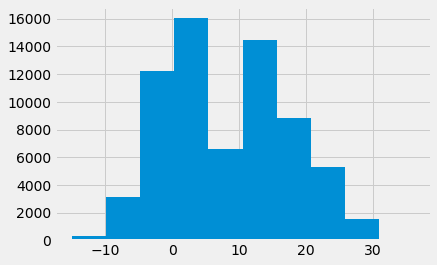

energy_100g
moy:
 1049.1020219050533
med:
 977.0
mod:
 0    192.0
dtype: float64
var:
 434084.57202371187
ect:
 658.8509482604634
skw:
 0.4123746404274854
kur:
 -0.8815699810431323


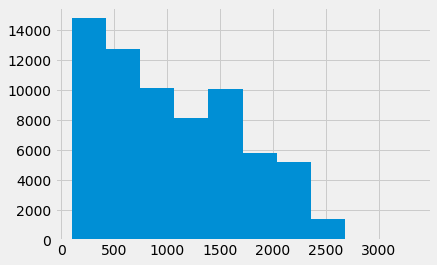

carbohydrates_100g
moy:
 25.773405375333436
med:
 14.0
mod:
 0    0.5
dtype: float64
var:
 668.974192193604
ect:
 25.86453541422316
skw:
 0.8356068884843116
kur:
 -0.6089305351895717


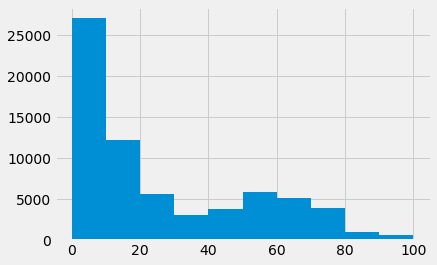

proteins_100g
moy:
 8.501066185393528
med:
 6.5
mod:
 0    0.5
dtype: float64
var:
 53.724214041368164
ect:
 7.329680350558827
skw:
 1.0412732081993132
kur:
 0.2859047941255257


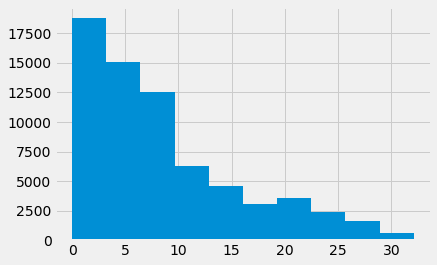

fat_100g
moy:
 12.12367082721063
med:
 7.7
mod:
 0    0.5
dtype: float64
var:
 155.50207535089558
ect:
 12.47004712705191
skw:
 1.1544896508659275
kur:
 0.7276948006033575


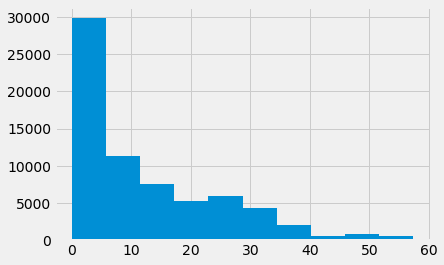

In [ ]:
for cat in df.columns:
    if df[cat].dtype == float:
      # print("-"*20)
      print(cat)
      print("moy:\n",df[cat].mean())
      print("med:\n",df[cat].median())
      print("mod:\n",df[cat].mode())
      print("var:\n",df[cat].var(ddof=0))
      print("ect:\n",df[cat].std(ddof=0))
      print("skw:\n",df[cat].skew())
      print("kur:\n",df[cat].kurtosis())
      with plt.style.context('fivethirtyeight'):
        df[cat].hist()
      plt.show()

In [ ]:
df.describe()

,nutriscore_score,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
count,68523.000000,68523.000000,68523.000000,68523.000000,68523.000000
mean,8.235935,1049.102022,25.773405,8.501066,12.123671
std,8.877236,658.855756,25.864724,7.329734,12.470138
min,-15.000000,101.000000,0.000000,0.000000,0.000000
25%,1.000000,472.000000,4.000000,3.000000,1.800000
50%,8.000000,977.000000,14.000000,6.500000,7.700000
75%,15.000000,1544.000000,49.000000,12.000000,20.000000
max,36.000000,3326.000000,100.000000,32.100000,57.400000


## Mesures de concentration

La librairie ```quantencon``` nous permetra connaître la répartition de valuers enérgetiques en calculant la courbe de Lorentz.

In [ ]:
pip install quantecon

     |████████████████████████████████| 235kB 5.4MB/s 


In [ ]:
import quantecon as qe

Les hydrates de carbone sont reparties de la manière suivante.

nutriscore_score


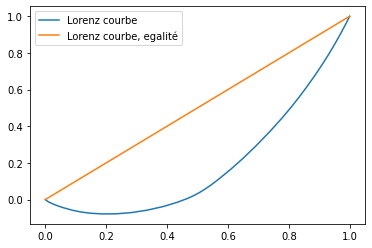

energy_100g


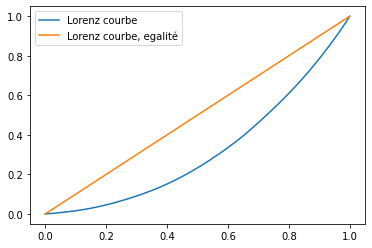

carbohydrates_100g


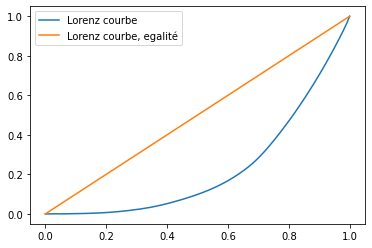

proteins_100g


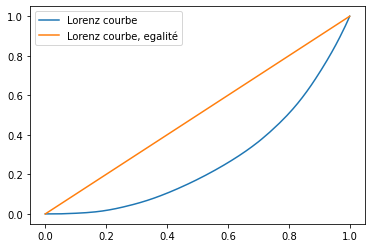

fat_100g


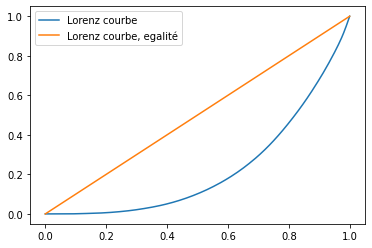

In [ ]:
for cat in df.columns:
    if df[cat].dtype == float:
      print(cat)
      carbs = df[cat].values
      f_vals, l_vals = qe.lorenz_curve(carbs)
      fig, ax = plt.subplots()
      ax.plot(f_vals, l_vals, label='Lorenz courbe')
      ax.plot(f_vals, f_vals, label='Lorenz courbe, egalité')
      ax.legend()
      plt.show()

Pour miex comparer leur distributions, affichons les courbes de Lorenz dans une seule graphique.

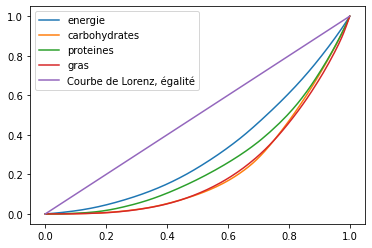

In [ ]:
ene = df['energy_100g'].values
f_ene_vals, l_ene_vals = qe.lorenz_curve(ene)
carbo = df['carbohydrates_100g'].values
f_carbo_vals, l_carbo_vals = qe.lorenz_curve(carbo)
prot = df['proteins_100g'].values
f_prot_vals, l_prot_vals = qe.lorenz_curve(prot)
gras = df['fat_100g'].values
f_gras_vals, l_gras_vals = qe.lorenz_curve(gras)

fig, ax = plt.subplots()
ax.plot(f_ene_vals, l_ene_vals, label='energie')
ax.plot(f_carbo_vals, l_carbo_vals, label='carbohydrates')
ax.plot(f_prot_vals, l_prot_vals, label='proteines')
ax.plot(f_gras_vals, l_gras_vals, label='gras', )

ax.plot(f_vals, f_vals, label='Courbe de Lorenz, égalité')
ax.legend()
plt.show()

## Catégories

Montrons les dix catégories les plus présentes dans le territoire français. En effet, la viande est la catégorie reine !

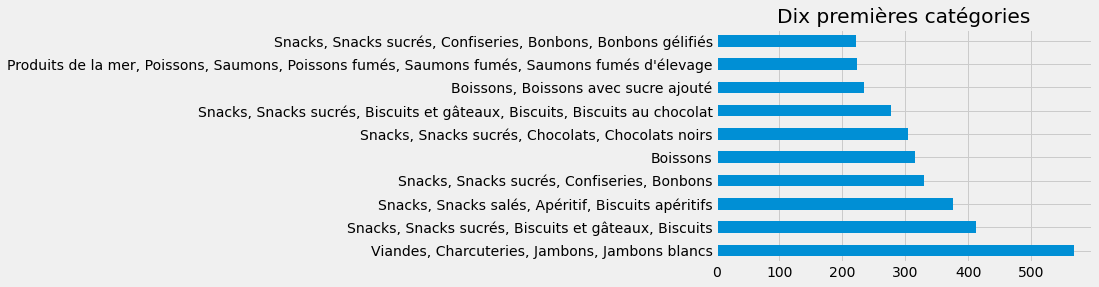

In [ ]:
with plt.style.context('fivethirtyeight'):
  df['categories'].value_counts(sort=True).head(10).plot.barh()
  plt.title('Dix premières catégories')
  plt.show()

Affichons maintenant le Top 10 pour cachune de nos variables qualitatives

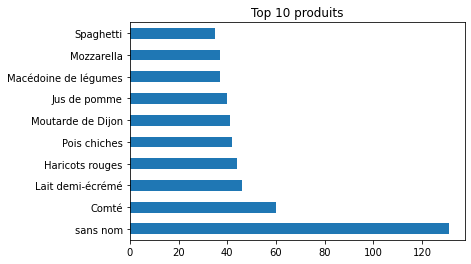

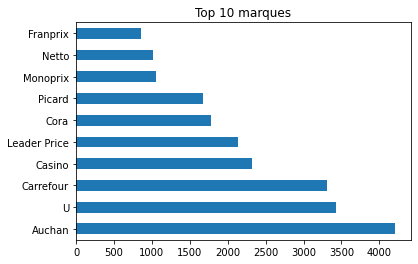

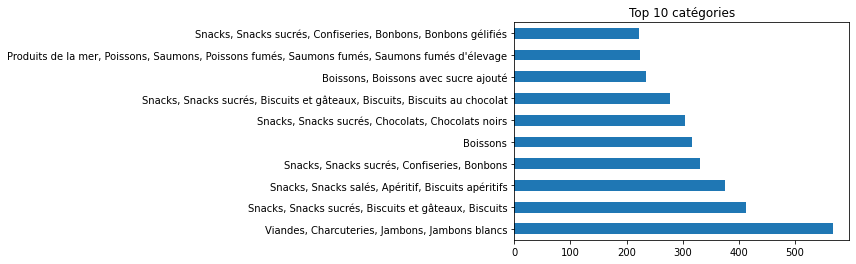

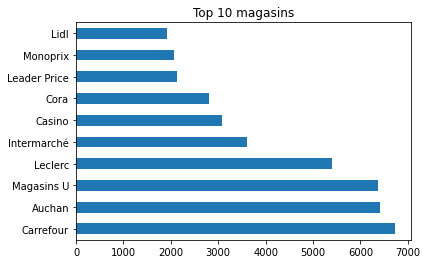

In [ ]:
pmc = ['product_name', 'brands', 'categories', 'stores']
noms = ['produits', 'marques', 'catégories',  'magasins']
for c, nom in zip(pmc,noms):
    df[c].value_counts(sort=True).head(10).plot.barh()
    plt.title('Top 10 {}'.format(nom))
    plt.show()

## Analyse multivarié

## Rélation entre variables quantitatives.

On se demande, par exemple, quelle est la rélation entre les hydrates de carbone et les niveaus des énergies indiqués. En effet, comme les catégories ne sont pas agroupées, on attend une rélation qui est loin d'être linéaire.

Visualisations aussi toutes les rélations des variables quantitatives, avec la variable Nutri score comme *hue*.

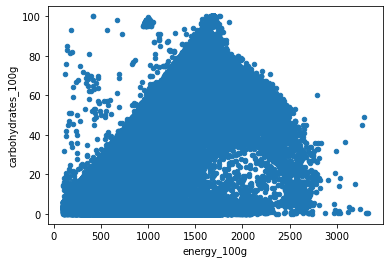

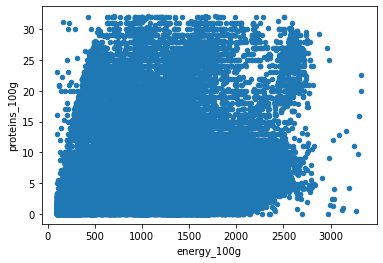

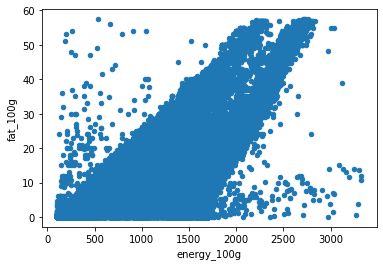

In [ ]:
var_rel = ['carbohydrates_100g', 'proteins_100g', 'fat_100g']
e = 'energy_100g'
for u in var_rel:
    data_u = pd.concat([df[e], df[u]], axis=1)
    data_u.plot.scatter(x=e, y=u);
    plt.show()

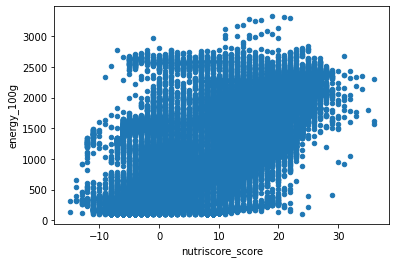

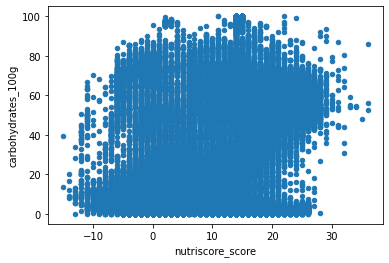

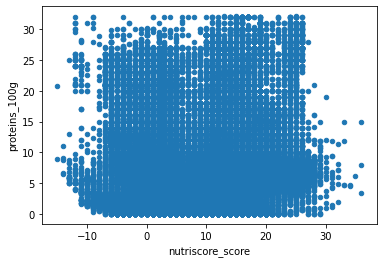

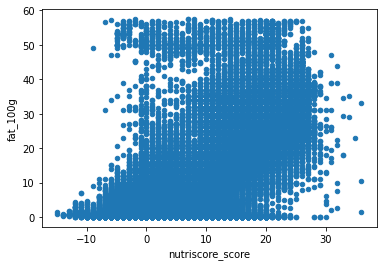

In [ ]:
va = ['energy_100g', 'carbohydrates_100g', 'proteins_100g', 'fat_100g']
nut = 'nutriscore_score'
for u in va:
    data_u = pd.concat([df[nut], df[u]], axis=1)
    data_u.plot.scatter(x=nut, y=u);
    plt.show()

En efftet, c'est mieux si on obtient toutes ces rélations à l'aide de ```seaborn```.

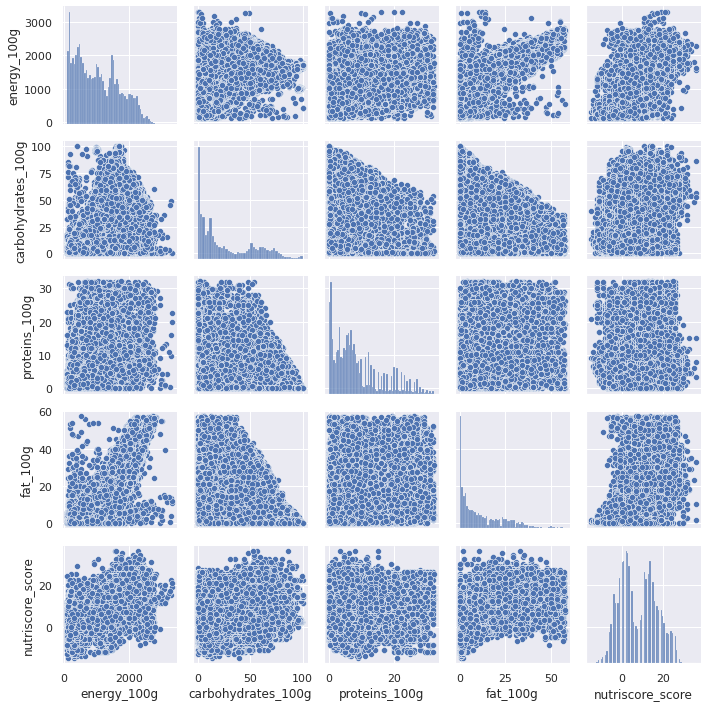

In [ ]:
sns.set()
cols = ['energy_100g', 'carbohydrates_100g', 'proteins_100g', 'fat_100g', 'nutriscore_score']
sns.pairplot(df[cols], height = 2.0)
plt.show()

## Corrélation

In [ ]:
df.corr(method='pearson')

,nutriscore_score,energy_100g,carbohydrates_100g,proteins_100g,fat_100g
nutriscore_score,1.000000,0.633875,0.239317,0.115569,0.647218
energy_100g,0.633875,1.000000,0.593570,0.251495,0.748557
carbohydrates_100g,0.239317,0.593570,1.000000,-0.260710,-0.025012
proteins_100g,0.115569,0.251495,-0.260710,1.000000,0.334023
fat_100g,0.647218,0.748557,-0.025012,0.334023,1.000000


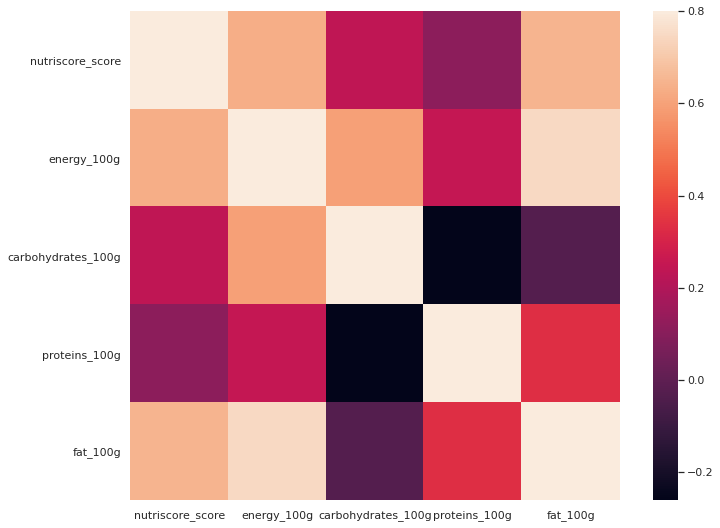

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Pour conclure, on fait un regression afin d'explorer si les hydrates de carbones ont un impact positive sur le nutri score.

In [ ]:
import statsmodels.formula.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nutrition_score_regression = sm.ols(formula= """nutriscore_score ~ energy_100g
                                   + fat_100g
                                   + carbohydrates_100g
                                   + proteins_100g
                                   """, data = df)
res = nutrition_score_regression.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 1.618e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:43:59   Log-Likelihood:            -2.2406e+05
No. Observations:               68523   AIC:                         4.481e+05
Df Residuals:                   68518   BIC:                         4.482e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7605      0

# Conclusions

1.   Si bien le jeu de données est assez irrégulier et contient un gran pourcentage de valeurs manquantes, il es possible d'effectuer un nettoyage rélativement simple pour mieux explorer les rélations entre les variables d'intérêt.
2.   L'analyse exploratoire nous indique qu'il est peu probable que les variables, d'après le choix et le traitement choisis, obéissent une rélation de linéarité.
3.   Les hydrates de carbone, comme attendu, sont fortement corrélés d'après notre étude. Néanmois, il faut être prudent avec l'intérpretion des résultats obtenus.
4. Dans le cadre de l'idée de notre application, on pense qu'un analyse plus attentif nous permettrai de mieux extraire les variables à choisir.